In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("TUANDROMD.csv")
dataset.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,ACCESS_PROVIDER,ACCESS_SERVICE,ACCESS_SHARED_DATA,ACCESS_SUPERUSER,ACCESS_SURFACE_FLINGER,ACCESS_WIFI_STATE,activityCalled,ACTIVITY_RECOGNITION,ACCOUNT_MANAGER,ADD_VOICEMAIL,ANT,ANT_ADMIN,AUTHENTICATE_ACCOUNTS,AUTORUN_MANAGER_LICENSE_MANAGER,AUTORUN_MANAGER_LICENSE_SERVICE(.autorun),BATTERY_STATS,BILLING,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_CARRIER_MESSAGING_SERVICE,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_GET_INSTALL_REFERRER_SERVICE,BIND_INPUT_METHOD,BIND_NFC_SERVICE,BIND_goodwareTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_REMOTEVIEWS,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BRICK,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,C2D_MESSAGE,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CAPTURE_SECURE_VIDEO_OUTPUT,CAPTURE_VIDEO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,CHANGE_CONFIGURATION,CHANGE_DISPLAY_MODE,CHANGE_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,CHANGE_WIFI_STATE,CHECK_LICENSE,CLEAR_APP_CACHE,CLEAR_APP_USER_DATA,CONTROL_LOCATION_UPDATES,DATABASE_INTERFACE_SERVICE,DELETE_CACHE_FILES,DELETE_PACKAGES,DEVICE_POWER,DIAGgoodwareSTIC,DISABLE_KEYGUARD,DOWNLOAD_SERVICE,DOWNLOAD_WITHOUT_goodwareTIFICATION,DUMP,EXPAND_STATUS_BAR,EXTENSION_PERMISSION,FACTORY_TEST,FLASHLIGHT,FORCE_BACK,FULLSCREEN.FULL,GET_ACCOUNTS,GET_PACKAGE_SIZE,GET_TASKS,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,GOOGLE_AUTH,GOOGLE_PHOTOS,HARDWARE_TEST,INJECT_EVENTS,INSTALL_LOCATION_PROVIDER,INSTALL_PACKAGES,INSTALL_SHORTCUT,INTERACT_ACROSS_USERS,INTERNAL_SYSTEM_WINDOW,INTERNET,JPUSH_MESSAGE,KILL_BACKGROUND_PROCESSES,LOCATION_HARDWARE,MANAGE_ACCOUNTS,MANAGE_APP_TOKENS,MANAGE_DOCUMENTS,MAPS_RECEIVE,MASTER_CLEAR,MEDIA_BUTTON,MEDIA_CONTENT_CONTROL,MESSAGE,MODIFY_AUDIO_SETTINGS,MODIFY_PHONE_STATE,MOUNT_FORMAT_FILESYSTEMS,MOUNT_UNMOUNT_FILESYSTEMS,NFC,PERSISTENT_ACTIVITY,PERMISSION,PERMISSION_RUN_TASKS,PLUGIN,PROCESS_OUTGOING_CALLS,READ,READ_ATTACHMENT,READ_AVESTTINGS,READ_CALENDAR,READ_CALL_LOG,READ_CONTACTS,READ_CONTENT_PROVIDER,READ_DATA,READ_DATABASES,READ_EXTERNAL_STORAGE,READ_FRAME_BUFFER,READ_GMAIL,READ_GSERVICES,READ_HISTORY_BOOKMARKS,READ_INPUT_STATE,READ_LOGS,READ_MESSAGES,READ_OWNER_DATA,READ_PHONE_STATE,READ_PROFILE,READ_SETTINGS,READ_SMS,READ_SOCIAL_STREAM,READ_SYNC_SETTINGS,READ_SYNC_STATS,READ_USER_DICTIONARY,READ_VOICEMAIL,REBOOT,RECEIVE,RECEIVE_BOOT_COMPLETED,RECEIVE_MMS,RECEIVE_SIGNED_DATA_RESULT,RECEIVE_SMS,RECEIVE_USER_PRESENT,RECEIVE_WAP_PUSH,RECORD_AUDIO,REORDER_TASKS,RESPOND,RESTART_PACKAGES,REQUEST,SDCARD_WRITE,SEND,SEND_RESPOND_VIA_MESSAGE,SEND_SMS,SET_ACTIVITY_WATCHER,SET_ALARM,SET_ALWAYS_FINISH,SET_ANIMATION_SCALE,SET_DEBUG_APP,SET_ORIENTATION,SET_POINTER_SPEED,SET_PREFERRED_APPLICATIONS,SET_PROCESS_LIMIT,SET_TIME,SET_TIME_ZONE,SET_WALLPAPER,SET_WALLPAPER_HINTS,SIGNAL_PERSISTENT_PROCESSES,STATUS_BAR,STORAGE,SUBSCRIBED_FEEDS_READ,SUBSCRIBED_FEEDS_WRITE,SYSTEM_ALERT_WINDOW,TRANSMIT_IR,UNINSTALL_SHORTCUT,UPDATE_DEVICE_STATS,USES_POLICY_FORCE_LOCK,USE_CREDENTIALS,USE_FINGERPRINT,USE_SIP,VIBRATE,WAKE_LOCK,WRITE,WRITE_APN_SETTINGS,WRITE_AVSETTING,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_DATA,WRITE_DATABASES,WRITE_EXTERNAL_STORAGE,WRITE_GSERVICES,WRITE_HISTORY_BOOKMARKS,WRITE_INTERNAL_STORAGE,WRITE_MEDIA_STORAGE,WRITE_OWNER_DATA,WRITE_PROFILE,WRITE_SECURE_SETTINGS,WRITE_SETTINGS,WRITE_SMS,WRITE_SOCIAL_STREAM,WRITE_SYNC_SETTINGS,WRITE_USER_DICTIONARY,WRITE_VOICEMAIL,Ljava/lang/reflect/Method;->invoke,Ljavax/crypto/Cipher;->doFinal,Ljava/lang/Runtime;->exec,Ljava/lang/System;->load,Ldalvik/system/DexClassLoader;->loadClass,Ljava/lang/System;->loadLibrary,Ljava/net/URL;->openConnection,Landroid/hardware/Camera;->open,Landroid/hardware/Camera;->takePicture,Landroid/t

In [3]:
dataset.shape

(4465, 242)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB


## Missing values

In [5]:
missing_features = [feature for feature in dataset.columns if dataset[feature].isna().sum() >= 1]
len(missing_features)

242

In [6]:
missing_rows = dataset.isnull().sum(axis=1)
missing_rows = dataset[missing_rows > 0]
len(missing_rows)
# here we can see that only one row contail NULL values. So we can remove that

1

In [7]:
dataset.dropna(inplace=True)
dataset.shape

(4464, 242)

## Encoding 

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Label'] = le.fit_transform(dataset['Label'])
print(le.classes_)

['goodware' 'malware']


In [9]:
dataset.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,ACCESS_PROVIDER,ACCESS_SERVICE,ACCESS_SHARED_DATA,ACCESS_SUPERUSER,ACCESS_SURFACE_FLINGER,ACCESS_WIFI_STATE,activityCalled,ACTIVITY_RECOGNITION,ACCOUNT_MANAGER,ADD_VOICEMAIL,ANT,ANT_ADMIN,AUTHENTICATE_ACCOUNTS,AUTORUN_MANAGER_LICENSE_MANAGER,AUTORUN_MANAGER_LICENSE_SERVICE(.autorun),BATTERY_STATS,BILLING,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_CARRIER_MESSAGING_SERVICE,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_GET_INSTALL_REFERRER_SERVICE,BIND_INPUT_METHOD,BIND_NFC_SERVICE,BIND_goodwareTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_REMOTEVIEWS,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BRICK,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,C2D_MESSAGE,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CAPTURE_SECURE_VIDEO_OUTPUT,CAPTURE_VIDEO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,CHANGE_CONFIGURATION,CHANGE_DISPLAY_MODE,CHANGE_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,CHANGE_WIFI_STATE,CHECK_LICENSE,CLEAR_APP_CACHE,CLEAR_APP_USER_DATA,CONTROL_LOCATION_UPDATES,DATABASE_INTERFACE_SERVICE,DELETE_CACHE_FILES,DELETE_PACKAGES,DEVICE_POWER,DIAGgoodwareSTIC,DISABLE_KEYGUARD,DOWNLOAD_SERVICE,DOWNLOAD_WITHOUT_goodwareTIFICATION,DUMP,EXPAND_STATUS_BAR,EXTENSION_PERMISSION,FACTORY_TEST,FLASHLIGHT,FORCE_BACK,FULLSCREEN.FULL,GET_ACCOUNTS,GET_PACKAGE_SIZE,GET_TASKS,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,GOOGLE_AUTH,GOOGLE_PHOTOS,HARDWARE_TEST,INJECT_EVENTS,INSTALL_LOCATION_PROVIDER,INSTALL_PACKAGES,INSTALL_SHORTCUT,INTERACT_ACROSS_USERS,INTERNAL_SYSTEM_WINDOW,INTERNET,JPUSH_MESSAGE,KILL_BACKGROUND_PROCESSES,LOCATION_HARDWARE,MANAGE_ACCOUNTS,MANAGE_APP_TOKENS,MANAGE_DOCUMENTS,MAPS_RECEIVE,MASTER_CLEAR,MEDIA_BUTTON,MEDIA_CONTENT_CONTROL,MESSAGE,MODIFY_AUDIO_SETTINGS,MODIFY_PHONE_STATE,MOUNT_FORMAT_FILESYSTEMS,MOUNT_UNMOUNT_FILESYSTEMS,NFC,PERSISTENT_ACTIVITY,PERMISSION,PERMISSION_RUN_TASKS,PLUGIN,PROCESS_OUTGOING_CALLS,READ,READ_ATTACHMENT,READ_AVESTTINGS,READ_CALENDAR,READ_CALL_LOG,READ_CONTACTS,READ_CONTENT_PROVIDER,READ_DATA,READ_DATABASES,READ_EXTERNAL_STORAGE,READ_FRAME_BUFFER,READ_GMAIL,READ_GSERVICES,READ_HISTORY_BOOKMARKS,READ_INPUT_STATE,READ_LOGS,READ_MESSAGES,READ_OWNER_DATA,READ_PHONE_STATE,READ_PROFILE,READ_SETTINGS,READ_SMS,READ_SOCIAL_STREAM,READ_SYNC_SETTINGS,READ_SYNC_STATS,READ_USER_DICTIONARY,READ_VOICEMAIL,REBOOT,RECEIVE,RECEIVE_BOOT_COMPLETED,RECEIVE_MMS,RECEIVE_SIGNED_DATA_RESULT,RECEIVE_SMS,RECEIVE_USER_PRESENT,RECEIVE_WAP_PUSH,RECORD_AUDIO,REORDER_TASKS,RESPOND,RESTART_PACKAGES,REQUEST,SDCARD_WRITE,SEND,SEND_RESPOND_VIA_MESSAGE,SEND_SMS,SET_ACTIVITY_WATCHER,SET_ALARM,SET_ALWAYS_FINISH,SET_ANIMATION_SCALE,SET_DEBUG_APP,SET_ORIENTATION,SET_POINTER_SPEED,SET_PREFERRED_APPLICATIONS,SET_PROCESS_LIMIT,SET_TIME,SET_TIME_ZONE,SET_WALLPAPER,SET_WALLPAPER_HINTS,SIGNAL_PERSISTENT_PROCESSES,STATUS_BAR,STORAGE,SUBSCRIBED_FEEDS_READ,SUBSCRIBED_FEEDS_WRITE,SYSTEM_ALERT_WINDOW,TRANSMIT_IR,UNINSTALL_SHORTCUT,UPDATE_DEVICE_STATS,USES_POLICY_FORCE_LOCK,USE_CREDENTIALS,USE_FINGERPRINT,USE_SIP,VIBRATE,WAKE_LOCK,WRITE,WRITE_APN_SETTINGS,WRITE_AVSETTING,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_DATA,WRITE_DATABASES,WRITE_EXTERNAL_STORAGE,WRITE_GSERVICES,WRITE_HISTORY_BOOKMARKS,WRITE_INTERNAL_STORAGE,WRITE_MEDIA_STORAGE,WRITE_OWNER_DATA,WRITE_PROFILE,WRITE_SECURE_SETTINGS,WRITE_SETTINGS,WRITE_SMS,WRITE_SOCIAL_STREAM,WRITE_SYNC_SETTINGS,WRITE_USER_DICTIONARY,WRITE_VOICEMAIL,Ljava/lang/reflect/Method;->invoke,Ljavax/crypto/Cipher;->doFinal,Ljava/lang/Runtime;->exec,Ljava/lang/System;->load,Ldalvik/system/DexClassLoader;->loadClass,Ljava/lang/System;->loadLibrary,Ljava/net/URL;->openConnection,Landroid/hardware/Camera;->open,Landroid/hardware/Camera;->takePicture,Landroid/t

## Handling imbalanced Features

<Axes: xlabel='Label'>

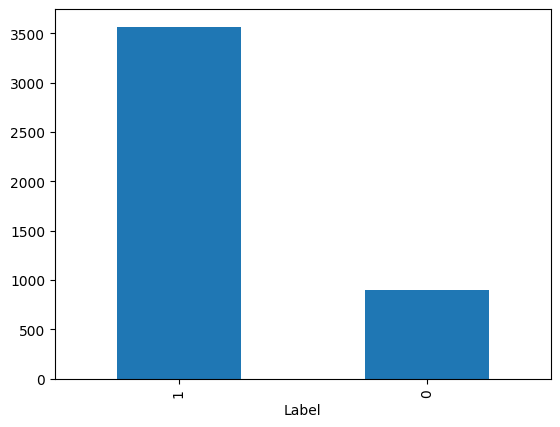

In [10]:
dataset['Label'].value_counts().plot.bar()

In [11]:
## Here Label feature is inballanced so we will perform upsampling

## Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['Label'],axis=1)
Y = dataset['Label']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Models

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

Accuracy Score : 0.9518477043673013


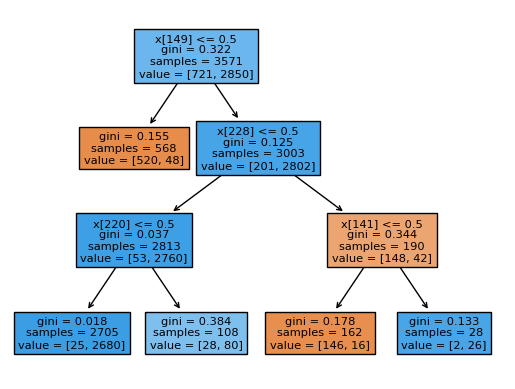

In [15]:
dtc_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, max_leaf_nodes=5, random_state=0)
dtc_gini.fit(x_train,y_train)

y_pred = dtc_gini.predict(x_test)

print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

plot_tree(dtc_gini,filled=True)
# plot_tree(dtc_gini,filled=True, feature_names=list(x_train.columns), class_names=[str(cls) for cls in y_train.unique()])
plt.show()

Accuracy Score : 0.9496080627099664


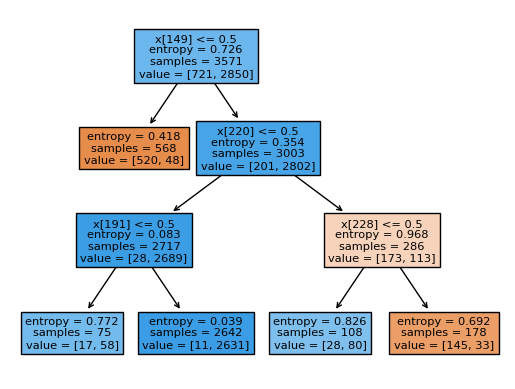

In [16]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, max_leaf_nodes=5, random_state=0)
dtc_entropy.fit(x_train,y_train)

y_pred = dtc_entropy.predict(x_test)

print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

plot_tree(dtc_entropy,filled=True)
plt.show()

Accuracy Score : 0.9496080627099664


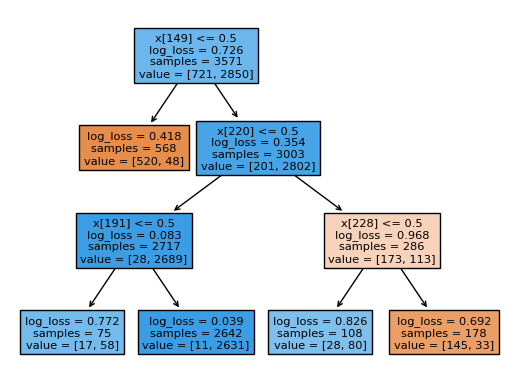

In [17]:
dtc_entropy = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=3, max_leaf_nodes=5, random_state=0)
dtc_entropy.fit(x_train,y_train)

y_pred = dtc_entropy.predict(x_test)

print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

plot_tree(dtc_entropy,filled=True)
plt.show()

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

Accuracy Score : 0.9921612541993281


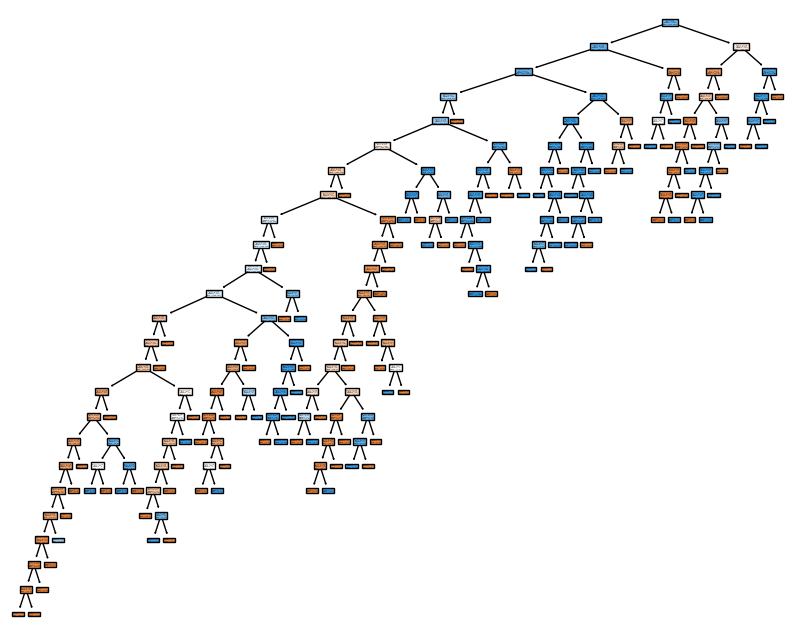

In [19]:
# Random Forest classifier with gini criterion
rfc_gini = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=0)
rfc_gini.fit(x_train,y_train)

y_pred = rfc_gini.predict(x_test)
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

# Extract one tree from the forest
tree_to_plot = rfc_gini.estimators_[0]

plt.figure(figsize=(10, 8))
plot_tree(tree_to_plot, filled=True)
plt.show()

Accuracy Score : 0.9921612541993281


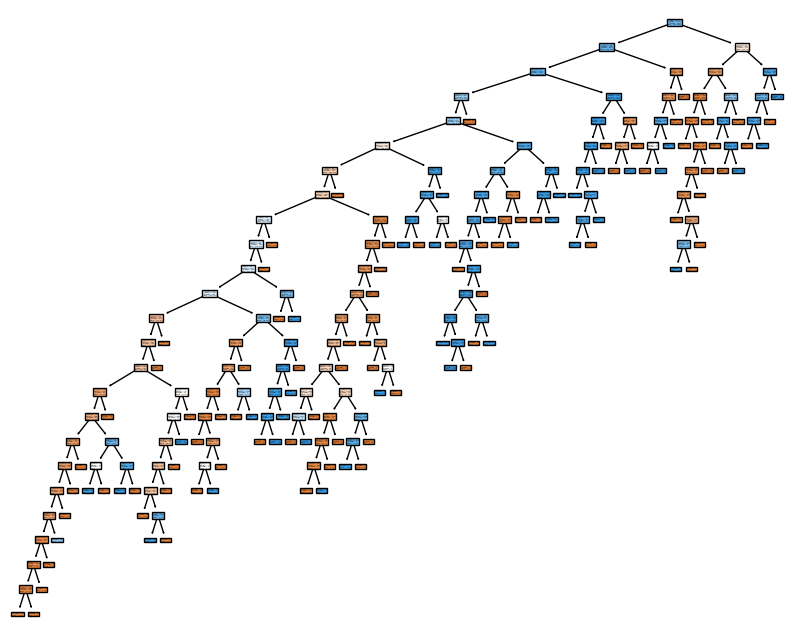

In [20]:
# Random Forest classifier with gini criterion
rfc_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rfc_entropy.fit(x_train,y_train)

y_pred = rfc_entropy.predict(x_test)
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

tree_to_plot = rfc_entropy.estimators_[0]

plt.figure(figsize=(10, 8))
plot_tree(tree_to_plot, filled=True)
plt.show()

## Logistic Regression


In [21]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()

LG.fit(x_train, y_train)

y_pred = LG.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9787234042553191


## Ada Boost Classifier¶


In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
abc = AdaBoostClassifier(n_estimators=200,random_state=0)
abc.fit(x_train,y_train)

y_pred = abc.predict(x_test)

print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

Accuracy Score : 0.9832026875699889


## Support Vector Machines (SVM)

In [24]:
from sklearn.svm import SVC
SVM = SVC()

SVM.fit(x_train, y_train)

y_pred = SVM.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9854423292273237


## XGBoost

In [25]:
import xgboost as xgb
XGB = xgb.XGBClassifier()

XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.9899216125419933


## Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Neural Network Accuracy:", accuracy)


ModuleNotFoundError: No module named 'keras'